In [3]:
import openai

In [4]:
from openai import OpenAI
import json

In [5]:
client = OpenAI(api_key="sk-OPEN_AI_API_KEY")

# Image-to-text pre-trained model

In [6]:
'''
This code uses the OpenAI client object to make a chat completion request using the GPT-4 Turbo model.
It sends a user message asking "What’s in this image?" along with an image URL. The response from the
model is stored in the response variable. The code then prints the assistant's response, which can be 
accessed using response.choices[0].
''' 
image_urls = [
    "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
    "https://cdn.pixabay.com/photo/2017/08/25/18/48/watercolor-2681039_1280.jpg",
    "https://cdn.pixabay.com/photo/2017/03/12/13/41/colorful-2137080_1280.jpg",
    "https://cdn.pixabay.com/photo/2018/03/30/15/11/deer-3275594_1280.jpg"
    # Add more image URLs as needed
]


descriptions = {}

for url in image_urls:
  response = client.chat.completions.create(
    model="gpt-4-turbo",
    messages=[
      {
        "role": "user",
        "content": [
          {"type": "text", "text": "What’s in this image?"},
          {
            "type": "image_url",
            "image_url": {
              "url": url,
            },
          },
        ],
      }
    ],
    max_tokens=300,
  )

  # print(response.choices[0])
  description = response.choices[0].message.content
  descriptions[url] = description

print('descriptions:', json.dumps(descriptions, indent=4))

descriptions: {
    "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg": "This image features a tranquil outdoor scene with a wooden boardwalk extending through a lush, green meadow. The boardwalk cuts straight through tall grasses, leading towards a landscape dotted with small bushes and trees under a wide, partly cloudy sky. The scenery exudes a sense of peacefulness and natural beauty, ideal for a serene walk or contemplation in nature. The vibrant greenery and light blue sky create a picturesque view, emphasizing the beauty of the natural environment.",
    "https://cdn.pixabay.com/photo/2017/08/25/18/48/watercolor-2681039_1280.jpg": "This image displays an abstract art piece that features a vibrant blend of colors in a fluid, marble-like pattern. It incorporates a wide range of colors, including pink, red, aqua, orange, and subtle hints of purple and blue. The various color

# Creating a predefined set of attributes to extract from images

In [7]:

'''
This code uses the OpenAI client object to make a chat completion request using the GPT-4 Turbo model.
It prompts the GPT to extract 7 pre-defined attributes from the description of the image input into 
the image-to-text response above. Then it converts the formatted string object into an object of attributes
that we can utilize further using json.
''' 

attributes = {}

for url, description in descriptions.items():
  response = client.chat.completions.create(
    model="gpt-4-turbo",
    messages=[
      {
        "role": "user",
        "content": [
          {"type": "text", 
          # prompt to extract 7 key pre-defined attributes: color palette, subject matter, mood/emotion, style/aesthetic, setting/location, time period, cultural/symbolic representation
          "text": "You are a machine learning model trained to extract specific attributes from a detailed description of an image. Your task is to identify the following seven attributes from the given text and represent them as key-value pairs in a Python dictionary: 1. Color Palette: Identify the dominant colors or color schemes present in the image. 2. Subject Matter: Identify the main subject, object, or theme depicted in the image. 3. Mood/Emotion: Identify the overall mood, emotion, or feeling conveyed by the image. 4. Style/Aesthetic: Identify the artistic style, aesthetic, or visual characteristics of the image. 5. Setting/Location: Identify the physical setting, location, or environment depicted in the image. 6. Time Period: Identify the time period, era, or historical context represented in the image. 7. Cultural/Symbolic Representation: Identify any cultural, symbolic, or metaphorical representations present in the image. Please provide your output in the following format: {'Color Palette': 'one or two word adjectives', 'Subject Matter': 'one or two word adjectives', 'Mood/Emotion': 'one or two word adjectives', 'Style/Aesthetic': 'one or two word adjectives', 'Setting/Location': 'one or two word adjectives', 'Time Period': 'one or two word adjectives', 'Cultural/Symbolic Representation': 'one or two word adjectives'}; if an attribute is not obvious, infer from the context of the description an attribute, don't use 'none' or 'not specified' as an attribute. Format the output in double quotations so I can convert it into an object with json. The description is as follows:" + description,
  },
          {
            "type": "text",
            "text" : json.dumps(description)
          },
        ],
      }
    ],
    max_tokens=500,
  )

  # string reponse from prompt
  attributes_content = response.choices[0].message.content

  # object to work with data
  attributes_dict = json.loads(attributes_content)

  # append to attributes dictionary
  attributes[url] = attributes_dict

print('Image - Attributes Dictionary:\n', json.dumps(attributes, indent=4))

KeyboardInterrupt: 

## Rigorous Version of Pre-trained Model

In [33]:
def image_to_text(image_url):

    response = client.chat.completions.create(
        model="gpt-4-turbo",
        messages=[
            {
                "role": "system",
                "content": "Please provide a thorough, detailed, and artistic description of the image in the following URL: " + image_url,
            }
        ],
        max_tokens=300,
    )
    
    return response.choices[0].message.content

In [ ]:
description = image_to_text("https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg")

print(description)

The image presents a serene and picturesque scene from a nature boardwalk in Madison, Wisconsin. The focus of the composition is an elegant, curved wooden walkway that invites viewers on a tranquil journey through a lush wetland environment. This gently winding pathway serves not only as a functional element allowing visitors to explore the natural beauty without disturbing the ecosystem but also as a visual guide leading the eye through the varied textures and shades of green of the landscape.

The setting is rich with an array of native plants, vivid in various greens that suggest a healthy, vibrant ecosystem. The foliage includes tall grasses which sway slightly, suggesting a gentle breeze. These grasses, interspersed with broader-leaved plants and punctuated occasionally by flowering blooms, create a tapestry of textures and shapes. The diversity of the plant life forms a dense, almost untamed layer that covers the ground and enriches the scene’s depth.

Overhead, a sky of mixed cl

In [9]:
def description_to_attributes(description):

    response = client.chat.completions.create(
        model = "gpt-4-turbo",
        messages=[
            {
                "role": "system",
                "content": "You are a machine learning model trained to extract specific attributes from a detailed description of an image. Your task is to identify the following seven attributes from the given text and represent them as key-value pairs in a Python dictionary: 1. Color Palette: Identify the dominant colors or color schemes present in the image. 2. Subject Matter: Identify the main subject, object, or theme depicted in the image. 3. Mood/Emotion: Identify the overall mood, emotion, or feeling conveyed by the image. 4. Style/Aesthetic: Identify the artistic style, aesthetic, or visual characteristics of the image. 5. Setting/Location: Identify the physical setting, location, or environment depicted in the image. 6. Time Period: Identify the time period, era, or historical context represented in the image. 7. Cultural/Symbolic Representation: Identify any cultural, symbolic, or metaphorical representations present in the image. Please provide your output in the following format: {'Color Palette': 'one or two word adjectives', 'Subject Matter': 'one or two word adjectives', 'Mood/Emotion': 'one or two word adjectives', 'Style/Aesthetic': 'one or two word adjectives', 'Setting/Location': 'one or two word adjectives', 'Time Period': 'one or two word adjectives', 'Cultural/Symbolic Representation': 'one or two word adjectives'}; if an attribute is not obvious, infer from the context of the description an attribute, don't use 'none' or 'not specified' as an attribute. Format the output in double quotations so I can convert it into an object with json. The description is as follows:" + description,
            }
        ],
        max_tokens=300,
    )

    attributes_content = response.choices[0].message.content
    attributes_dict = json.loads(attributes_content)

    return attributes_dict

In [ ]:
print(json.dumps(description_to_attributes(description), indent=4))

{
    "Color Palette": "purples, reds, browns",
    "Subject Matter": "deer's head",
    "Mood/Emotion": "vibrant",
    "Style/Aesthetic": "low-poly, geometric",
    "Setting/Location": "abstract",
    "Time Period": "contemporary",
    "Cultural/Symbolic Representation": "nature symbolism"
}


## Rigorous Version of Pre-Defined Model with specific set of labels

In [8]:
def description_to_attributes_predefined_labels(description):

    response = client.chat.completions.create(
        model = "gpt-4-turbo",
        messages=[
            {
                "role": "system",
                "content": "You are a machine learning model trained to extract specific attributes from a detailed description of an image. Your task is to identify and select the most appropriate label from the following pre-defined set of attributes for each of the seven categories given below, and represent them as key-value pairs in a Python dictionary: 1. Color Palette: Select the dominant colors or color schemes present in the image from the following options: [Vibrant, Monochromatic, Pastel, Earthy, Neon, Muted, Bold, Subdued, Contrasting, Harmonious, Warm, Cool, Saturated, Desaturated, Primary, Secondary, Tertiary]. 2. Subject Matter: Choose the main subject, object, or theme depicted in the image from the following options: [Landscape, Portrait, Still life, Abstract, Urban, Nature, Architecture, Human figure, Animals, Plants, Buildings, Interiors, Vehicles, Food, Technology, Fantasy, Surreal, Mythological, Historical event, Everyday objects]. 3. Mood/Emotion: Pick the overall mood, emotion, or feeling conveyed by the image from the following options: [Serene, Energetic, Melancholic, Joyful, Mysterious, Peaceful, Dramatic, Whimsical, Intense, Reflective, Nostalgic, Romantic, Foreboding, Playful, Thoughtful, Soothing, Chaotic, Hopeful]. 4. Style/Aesthetic: Select the artistic style, aesthetic, or visual characteristics of the image from the following options: [Realism, Impressionism, Surrealism, Minimalism, Expressionism, Cubism, Romanticism, Baroque, Renaissance, Gothic, Modernism, Postmodernism, Abstract expressionism, Fauvism, Dadaism, Pop art, Conceptual art]. 5. Setting/Location: Choose the physical setting, location, or environment depicted in the image from the following options: [Cityscape, Countryside, Beach, Forest, Mountains, Urban, Rural, Suburban, Indoor, Outdoor, Coastal, Desert, Arctic, Tropical, Industrial, Historical, Futuristic, Mythical, Extraterrestrial]. 6. Time Period: Pick the time period, era, or historical context represented in the image from the following options: [Contemporary, Renaissance, Medieval, Modern, Ancient, Futuristic, Victorian, Industrial revolution, Middle Ages, Renaissance, Prehistoric, Classical, Baroque, Gothic, Romantic, Edwardian, Roaring twenties, Art Deco, Post-war]. 7. Cultural/Symbolic Representation: Select any cultural, symbolic, or metaphorical representations present in the image from the following options: [Religious, Political, Mythological, Historical, Indigenous, Pop culture, Folklore, Literary, Ethnic, National, International, Gender, Social class, Environmental, Technological, Symbolic, Ritualistic, Iconic, Allegorical, Abstract]. Please provide your output in the following format: {'Color Palette': 'selected option', 'Subject Matter': 'selected option', 'Mood/Emotion': 'selected option', 'Style/Aesthetic': 'selected option', 'Setting/Location': 'selected option', 'Time Period': 'selected option', 'Cultural/Symbolic Representation': 'selected option'}; if an attribute is not obvious, infer from the context of the description an attribute, don't use 'none' or 'not specified' as an attribute. Format the output in double quotations so I can convert it into an object with json. The description is as follows:" + description
            }
        ],
        max_tokens=300,
    )

    attributes_content = response.choices[0].message.content
    attributes_dict = json.loads(attributes_content)

    return attributes_dict

In [ ]:
print(json.dumps(description_to_attributes_predefined_labels(description), indent=4))

{
    "Color Palette": "Vibrant",
    "Subject Matter": "Animals",
    "Mood/Emotion": "Dramatic",
    "Style/Aesthetic": "Minimalism",
    "Setting/Location": "Outdoor",
    "Time Period": "Contemporary",
    "Cultural/Symbolic Representation": "Symbolic"
}


## Modification of Pre-defined Model with Specific Set of Attributes to provide the 2 best options

In [11]:
def description_to_attributes_predefined_two(description):

    response = client.chat.completions.create(
        model = "gpt-4-turbo",
        messages=[
            {
                "role": "system",
                 "content": """
                You are a machine learning model trained to extract specific attributes from a detailed description of an image. 
                Your task is to identify and select the most appropriate label from the following pre-defined set of attributes for each of the seven categories given below, and represent them as key-value pairs in a Python dictionary: 
                1. Color Palette: Select up to 7 labels without repetition from only the following options, ordered from the most closely associated to the least associated with the image: [Vibrant, Monochromatic, Pastel, Earthy, Neon, Muted, Bold]. 
                2. Subject Matter: Choose up to 7 labels without repetition from only the following options, ordered from the most closely associated to the least associated with the image: [Landscape, Portrait, Still life, Abstract, Urban, Nature, Architecture]. 
                3. Mood/Emotion: Pick up to 7 labels without repetition from only the following options, ordered from the most closely associated to the least associated with the image: [Serene, Energetic, Melancholic, Joyful, Mysterious, Peaceful, Dramatic]. 
                4. Style/Aesthetic: Select up to 7 labels without repetition from only the following options, ordered from the most closely associated to the least associated with the image: [Realism, Impressionism, Surrealism, Minimalism, Expressionism, Cubism, Romanticism]. 
                5. Setting/Location: Choose up to 7 labels without repetition from only the following options, ordered from the most closely associated to the least associated with the image: [Cityscape, Countryside, Beach, Forest, Mountains, Urban, Rural]. 
                6. Time Period: Pick up to 7 labels without repetition from only the following options, ordered from the most closely associated to the least associated with the image: [Contemporary, Renaissance, Medieval, Modern, Ancient, Futuristic, Victorian]. 
                7. Cultural/Symbolic Representation: Select up to 7 labels without repetition from only the following options, ordered from the most closely associated to the least associated with the image: [Religious, Political, Mythological, Historical, Indigenous, Pop culture, Folklore]. 
                Please provide your output in the following format:  {'Color Palette': ['most associated label', ..., 'least associated label'],  'Subject Matter': ['most associated label', ..., 'least associated label'],  'Mood/Emotion': ['most associated label', ..., 'least associated label'], 'Style/Aesthetic': ['most associated label', ..., 'least associated label'],  'Setting/Location': ['most associated label', ..., 'least associated label'],  'Time Period': ['most associated label', ..., 'least associated label'],  'Cultural/Symbolic Representation': ['most associated label', ..., 'least associated label']}. 
                If an attribute is not obvious, infer from the context of the description an attribute, don't use 'none' or 'not specified' as an attribute. Only select attribute values from the provided list of options. PLEASE DO NOT Assign any attribute that is not present in the pre-defined attributes. Format the output in double quotations so it can be converted into an object with json. The description is as follows:
                """ + description
            }
        ],
        max_tokens=500,
    )

    attributes_content = response.choices[0].message.content
    attributes_dict = json.loads(attributes_content)

    return attributes_dict

In [ ]:
print(json.dumps(description_to_attributes_predefined_two(description), indent=4))

{
    "Color Palette": [
        "Vibrant",
        "Bold",
        "Earthy"
    ],
    "Subject Matter": [
        "Abstract",
        "Nature"
    ],
    "Mood/Emotion": [
        "Peaceful",
        "Serene"
    ],
    "Style/Aesthetic": [
        "Minimalism",
        "Surrealism"
    ],
    "Setting/Location": [
        "Forest"
    ],
    "Time Period": [
        "Contemporary",
        "Modern"
    ],
    "Cultural/Symbolic Representation": [
        "Mythological"
    ]
}


## Code to Quantify Comparison between two images to see which ones are closer

### Function to determine Images that are overall closer

In [121]:
# def validate_attributes(attributes_dict, predefined_list):
#     for key, values in attributes_dict.items():
#         valid_values = [value for value in values if value in predefined_list[key]]
#         while len(valid_values) < len(values):
#             for predefined_value in predefined_list[key]:
#                 if predefined_value not in valid_values:
#                     valid_values.append(predefined_value) 
#                     break
#         attributes_dict[key] = valid_values

def validate_attributes(attributes_dict, predefined_list):
    for key, values in attributes_dict.items():
        # Filter out invalid values
        valid_values = [value for value in values if value in predefined_list[key]]
        
        # If there are missing values, append predefined values at the end
        if len(valid_values) < len(values):
            # Get the predefined values that are not in valid_values
            missing_values = [value for value in predefined_list[key] if value not in valid_values]
            
            # Append the missing values at the end of valid_values
            valid_values.extend(missing_values[:len(values)-len(valid_values)])
        
        # Replace the original values with the valid values
        attributes_dict[key] = valid_values

    return attributes_dict

def validate_attributes_content(attribute_content):
    if '```json' in attribute_content:
        attribute_content = attribute_content.replace('```json', '')
        attribute_content = attribute_content.replace('```', '')
    
    # Find the first occurrence of '{' and the last occurrence of '}'
    start_index = attribute_content.find('{')
    end_index = attribute_content.rfind('}')

    # If '{' and '}' are found, slice the string to include only the content within these brackets
    if start_index != 0 and end_index != len(attribute_content) - 1:
        attribute_content = attribute_content[start_index:end_index+1]

    try:
        json.loads(attribute_content)
    except json.JSONDecodeError:
        return '{}'
    
    return attribute_content


def description_to_all_attributes(description):

    predefined_list = {
        'Color Palette': ['Vibrant', 'Monochromatic', 'Pastel', 'Earthy', 'Neon', 'Muted', 'Bold'],
        'Subject Matter': ['Landscape', 'Portrait', 'Still life', 'Abstract', 'Urban', 'Nature', 'Architecture'],
        'Mood/Emotion': ['Serene', 'Energetic', 'Melancholic', 'Joyful', 'Mysterious', 'Peaceful', 'Dramatic'],
        'Style/Aesthetic': ['Realism', 'Impressionism', 'Surrealism', 'Minimalism', 'Expressionism', 'Cubism', 'Romanticism'],
        'Setting/Location': ['Cityscape', 'Countryside', 'Beach', 'Forest', 'Mountains', 'Urban', 'Rural'],
        'Time Period': ['Contemporary', 'Renaissance', 'Medieval', 'Modern', 'Ancient', 'Futuristic', 'Victorian'],
        'Cultural/Symbolic Representation': ['Religious', 'Political', 'Mythological', 'Historical', 'Indigenous', 'Pop culture', 'Folklore']
    }


    response = client.chat.completions.create(
        model = "gpt-4-turbo",
        messages=[
            {
                "role": "system",
                "content": f"""
                You are a machine learning model trained to extract specific attributes from a detailed 
                description of an image. Your task is to identify and select the most appropriate label from 
                the following pre-defined set of attributes for each of the seven categories given below, and
                represent them as key-value pairs in a Python dictionary: 

                1. Color Palette: Select exactly 7 labels without repetition from only the following options, 
                ordered from the most closely associated to the least associated with the image: 
                {predefined_list['Color Palette']}. 

                2. Subject Matter: Select exactly 7 labels without repetition from only the following options, 
                ordered from the most closely associated to the least associated with the image: 
                {predefined_list['Subject Matter']}. 

                3. Mood/Emotion: Select exactly 7 labels without repetition from only the following options, 
                ordered from the most closely associated to the least associated with the image: 
                {predefined_list['Mood/Emotion']}. 

                4. Style/Aesthetic: Select exactly 7 labels without repetition from ONLY the following options, 
                ordered from the most closely associated to the least associated with the image: 
                {predefined_list['Style/Aesthetic']}. 

                5. Setting/Location: Select exactly 7 labels without repetition from only the following options, 
                ordered from the most closely associated to the least associated with the image: 
                {predefined_list['Setting/Location']}. 

                6. Time Period: Select exactly 7 labels without repetition from only the following options, 
                ordered from the most closely associated to the least associated with the image: 
                {predefined_list['Time Period']}.

                7. Cultural/Symbolic Representation: Select Exactly 7 labels without repetition from only the 
                following options, ordered from the most closely associated to the least associated with the image: 
                {predefined_list['Cultural/Symbolic Representation']}

                Please provide your output in the following format:  
                {{'Color Palette': ['most associated label', ..., 'least associated label'],  
                'Subject Matter': ['most associated label', ..., 'least associated label'],  
                'Mood/Emotion': ['most associated label', ..., 'least associated label'], 
                'Style/Aesthetic': ['most associated label', ..., 'least associated label'],  
                'Setting/Location': ['most associated label', ..., 'least associated label'],  
                'Time Period': ['most associated label', ..., 'least associated label'],  
                'Cultural/Symbolic Representation': ['most associated label', ..., 'least associated label']}}. 

                If an attribute is not obvious, infer from the context of the description an attribute, 
                don't use 'none' or 'not specified' as an attribute. Remember, you MUST ONLY select attribute values from the provided
                list of options. DO NOT assign any attribute that is not present in the pre-defined attributes. I repeat - no label in the result should be outside the predefined 
                set of labels for each attribute. Format the output in double quotations so it can be 
                converted into an object with json. The description is as follows:""" + description
            }
        ],
        max_tokens=500,
    )
    
    attributes_content = response.choices[0].message.content
    # print('attribute_content', attributes_content)

    attributes_content = validate_attributes_content(attributes_content)

    print('attributes_content: ', attributes_content)

    try:
        attributes_dict = json.loads(attributes_content)
    except json.JSONDecodeError:
        attributes_dict = '{}'

    print('attributes_dict: ', attributes_dict)
    
    attributes_dict = validate_attributes(attributes_dict, predefined_list)

    print('attributes_dict validated: ', attributes_dict)

    return attributes_dict

In [122]:
obj = description_to_all_attributes(description)
print(json.dumps(obj, indent=4))

# print the length of the array for each attribute in the object

for key, value in obj.items():
    print(key, len(value))


attributes_content:  {
    "Color Palette": ["Vibrant", "Bold", "Muted", "Monochromatic", "Pastel", "Neon", "Earthy"],
    "Subject Matter": ["Abstract", "Nature", "Still life", "Portrait", "Landscape", "Architecture", "Urban"],
    "Mood/Emotion": ["Mysterious", "Energetic", "Dramatic", "Serene", "Peaceful", "Joyful", "Melancholic"],
    "Style/Aesthetic": ["Minimalism", "Modernism", "Cubism", "Expressionism", "Surrealism", "Realism", "Romanticism"],
    "Setting/Location": ["Forest", "Countryside", "Cityscape", "Mountains", "Beach", "Rural", "Urban"],
    "Time Period": ["Modern", "Contemporary", "Futuristic", "Victorian", "Renaissance", "Medieval", "Ancient"],
    "Cultural/Symbolic Representation": ["Pop culture", "Historical", "Political", "Mythological", "Religious", "Indigenous", "Folklore"]
}
attributes_dict:  {'Color Palette': ['Vibrant', 'Bold', 'Muted', 'Monochromatic', 'Pastel', 'Neon', 'Earthy'], 'Subject Matter': ['Abstract', 'Nature', 'Still life', 'Portrait', 'Landscape

## Implementing Manhattan Distance Based Method to quantify discimilarity between image labels

In [27]:
def array_ordering_discimilarity(arr1, arr2):
    print(arr1)
    index_dict = {element: i for i, element in enumerate(arr2)}

    # Calculate the sum of absolute distances
    total_distance = 0
    for i, element in enumerate(arr1):
        if element in index_dict:
            index_in_array2 = index_dict[element]
            distance = abs(i - index_in_array2)
            total_distance += distance
        else: 
            print(f"Warning '{element}' not found in .")
    return total_distance

In [28]:
array1 = ['a', 'b', 'c', 'd']
array2 = ['b', 'a', 'c', 'd']
similarity_score = array_ordering_discimilarity(array1, array2)
print("Similarity Score:", similarity_score)

['a', 'b', 'c', 'd']
Similarity Score: 2


In [29]:
test_obj = {
  "Color Palette": ["Vibrant", "Monochromatic", "Pastel", "Earthy", "Neon", "Muted", "Bold"],
  "Subject Matter": ["Landscape", "Portrait", "Still life", "Abstract", "Urban", "Nature", "Architecture"],
  "Mood/Emotion": ["Serene", "Energetic", "Melancholic", "Joyful", "Mysterious", "Peaceful", "Dramatic"],
  "Style/Aesthetic": ["Realism", "Impressionism", "Surrealism", "Minimalism", "Expressionism", "Cubism", "Romanticism"],
  "Setting/Location": ["Cityscape", "Countryside", "Beach", "Forest", "Mountains", "Urban", "Rural"],
  "Time Period": ["Contemporary", "Renaissance", "Medieval", "Modern", "Ancient", "Futuristic", "Victorian"],
  "Cultural/Symbolic Representation": ["Religious", "Political", "Mythological", "Historical", "Indigenous", "Pop culture", "Folklore"]
}

for key, value in test_obj.items():
    print(key, len(value))

Color Palette 7
Subject Matter 7
Mood/Emotion 7
Style/Aesthetic 7
Setting/Location 7
Time Period 7
Cultural/Symbolic Representation 7


In [30]:
def image_labels_discimilarity(image_attributes, user_attributes):

    total_distance = 0
    
    for key, value in image_attributes.items():

        user_value = user_attributes[key]
        distance = array_ordering_discimilarity(value, user_value)
        total_distance += distance
    
    return total_distance

In [31]:
test_distance = image_labels_discimilarity(test_obj, obj)
print("Test Distance:", test_distance)

['Vibrant', 'Monochromatic', 'Pastel', 'Earthy', 'Neon', 'Muted', 'Bold']
['Landscape', 'Portrait', 'Still life', 'Abstract', 'Urban', 'Nature', 'Architecture']
['Serene', 'Energetic', 'Melancholic', 'Joyful', 'Mysterious', 'Peaceful', 'Dramatic']
['Realism', 'Impressionism', 'Surrealism', 'Minimalism', 'Expressionism', 'Cubism', 'Romanticism']
['Cityscape', 'Countryside', 'Beach', 'Forest', 'Mountains', 'Urban', 'Rural']
['Contemporary', 'Renaissance', 'Medieval', 'Modern', 'Ancient', 'Futuristic', 'Victorian']
['Religious', 'Political', 'Mythological', 'Historical', 'Indigenous', 'Pop culture', 'Folklore']
Test Distance: 112


In [36]:
test_url1 = "https://upload.wikimedia.org/wikipedia/commons/e/e2/Lake_Tekapo_01.jpg"
test_url1_attributes = description_to_all_attributes(image_to_text(test_url1))
print(json.dumps(test_url1_attributes, indent=4))

attribute_content {
    "Color Palette": ["Vibrant", "Bold", "Earthy", "Pastel", "Muted", "Monochromatic", "Neon"],
    "Subject Matter": ["Landscape", "Nature", "Still life", "Abstract", "Urban", "Architecture", "Portrait"],
    "Mood/Emotion": ["Serene", "Peaceful", "Dramatic", "Joyful", "Mysterious", "Energetic", "Melancholic"],
    "Style/Aesthetic": ["Realism", "Impressionism", "Surrealism", "Romanticism", "Expressionism", "Minimalism", "Cubism"],
    "Setting/Location": ["Countryside", "Mountains", "Forest", "Beach", "Rural", "Cityscape", "Urban"],
    "Time Period": ["Contemporary", "Modern", "Victorian", "Renaissance", "Medieval", "Ancient", "Futuristic"],
    "Cultural/Symbolic Representation": ["Indigenous", "Historical", "Folklore", "Mythological", "Religious", "Political", "Pop culture"]
}
{
    "Color Palette": [
        "Vibrant",
        "Bold",
        "Earthy",
        "Pastel",
        "Muted",
        "Monochromatic",
        "Neon"
    ],
    "Subject Matter": [
   

In [ ]:
test_distance_url1 = image_labels_discimilarity(test_url1_attributes, test_obj)
print("Test Distance URL1:", test_distance_url1)

index_dict: {'Vibrant': 0, 'Monochromatic': 1, 'Pastel': 2, 'Earthy': 3, 'Neon': 4, 'Muted': 5, 'Bold': 6}
index_dict: {'Landscape': 0, 'Portrait': 1, 'Still life': 2, 'Abstract': 3, 'Urban': 4, 'Nature': 5, 'Architecture': 6}
index_dict: {'Serene': 0, 'Energetic': 1, 'Melancholic': 2, 'Joyful': 3, 'Mysterious': 4, 'Peaceful': 5, 'Dramatic': 6}
index_dict: {'Realism': 0, 'Impressionism': 1, 'Surrealism': 2, 'Minimalism': 3, 'Expressionism': 4, 'Cubism': 5, 'Romanticism': 6}
index_dict: {'Cityscape': 0, 'Countryside': 1, 'Beach': 2, 'Forest': 3, 'Mountains': 4, 'Urban': 5, 'Rural': 6}
index_dict: {'Contemporary': 0, 'Renaissance': 1, 'Medieval': 2, 'Modern': 3, 'Ancient': 4, 'Futuristic': 5, 'Victorian': 6}
index_dict: {'Religious': 0, 'Political': 1, 'Mythological': 2, 'Historical': 3, 'Indigenous': 4, 'Pop culture': 5, 'Folklore': 6}
Test Distance URL1: 98


In [38]:
test_url2 = "https://upload.wikimedia.org/wikipedia/commons/8/82/Найкращі_миті_життя.jpg"
test_url2_attributes = description_to_all_attributes(image_to_text(test_url2))
print(test_url2_attributes)

attribute_content {
    "Color Palette": ["Vibrant", "Bold", "Neon", "Muted", "Pastel", "Earthy", "Monochromatic"],
    "Subject Matter": ["Urban", "Abstract", "Portrait", "Street Scene", "Architecture", "Landscape", "Still life"],
    "Mood/Emotion": ["Energetic", "Dramatic", "Joyful", "Serene", "Mysterious", "Peaceful", "Melancholic"],
    "Style/Aesthetic": ["Contemporary", "Expressionism", "Minimalism", "Surrealism", "Realism", "Impressionism", "Cubism"],
    "Setting/Location": ["Cityscape", "Urban", "Countryside", "Beach", "Forest", "Mountains", "Rural"],
    "Time Period": ["Modern", "Contemporary", "Futuristic", "Victorian", "Renaissance", "Medieval", "Ancient"],
    "Cultural/Symbolic Representation": ["Pop culture", "Historical", "Political", "Religious", "Mythological", "Indigenous", "Folklore"]
}
{'Color Palette': ['Vibrant', 'Bold', 'Neon', 'Muted', 'Pastel', 'Earthy', 'Monochromatic'], 'Subject Matter': ['Urban', 'Abstract', 'Portrait', 'Architecture', 'Landscape', 'Still

In [39]:
test_distance_url2 = image_labels_discimilarity(test_url2_attributes, test_obj)
print("Test Distance URL2:", test_distance_url2)

['Vibrant', 'Bold', 'Neon', 'Muted', 'Pastel', 'Earthy', 'Monochromatic']
['Urban', 'Abstract', 'Portrait', 'Architecture', 'Landscape', 'Still life', 'Nature']
['Energetic', 'Dramatic', 'Joyful', 'Serene', 'Mysterious', 'Peaceful', 'Melancholic']
['Expressionism', 'Minimalism', 'Surrealism', 'Realism', 'Impressionism', 'Cubism', 'Romanticism']
['Cityscape', 'Urban', 'Countryside', 'Beach', 'Forest', 'Mountains', 'Rural']
['Modern', 'Contemporary', 'Futuristic', 'Victorian', 'Renaissance', 'Medieval', 'Ancient']
['Pop culture', 'Historical', 'Political', 'Religious', 'Mythological', 'Indigenous', 'Folklore']
Test Distance URL2: 102


In [43]:
test_url3 = "https://upload.wikimedia.org/wikipedia/commons/6/69/Russia._Industry_Orekhovo-Zuevo._img-004.jpg"
test_url3_attributes = description_to_all_attributes(image_to_text(test_url3))
print(test_url3_attributes)

attribute_content {
    "Color Palette": ["Muted", "Earthy", "Pastel", "Monochromatic", "Vibrant", "Bold", "Neon"],
    "Subject Matter": ["Urban", "Landscape", "Architecture", "Nature", "Abstract", "Still life", "Portrait"],
    "Mood/Emotion": ["Serene", "Mysterious", "Peaceful", "Melancholic", "Dramatic", "Energetic", "Joyful"],
    "Style/Aesthetic": ["Realism", "Minimalism", "Expressionism", "Surrealism", "Impressionism", "Cubism", "Romanticism"],
    "Setting/Location": ["Cityscape", "Urban", "Rural", "Countryside", "Forest", "Mountains", "Beach"],
    "Time Period": ["Modern", "Contemporary", "Medieval", "Renaissance", "Ancient", "Victorian", "Futuristic"],
    "Cultural/Symbolic Representation": ["Historical", "Political", "Indigenous", "Religious", "Mythological", "Pop culture", "Folklore"]
}
{'Color Palette': ['Muted', 'Earthy', 'Pastel', 'Monochromatic', 'Vibrant', 'Bold', 'Neon'], 'Subject Matter': ['Urban', 'Landscape', 'Architecture', 'Nature', 'Abstract', 'Still life', '

In [44]:
test_distance_url3 = image_labels_discimilarity(test_url3_attributes, test_obj)
print("Test Distance URL3:", test_distance_url3)

['Muted', 'Earthy', 'Pastel', 'Monochromatic', 'Vibrant', 'Bold', 'Neon']
['Urban', 'Landscape', 'Architecture', 'Nature', 'Abstract', 'Still life', 'Portrait']
['Serene', 'Mysterious', 'Peaceful', 'Melancholic', 'Dramatic', 'Energetic', 'Joyful']
['Realism', 'Minimalism', 'Expressionism', 'Surrealism', 'Impressionism', 'Cubism', 'Romanticism']
['Cityscape', 'Urban', 'Rural', 'Countryside', 'Forest', 'Mountains', 'Beach']
['Modern', 'Contemporary', 'Medieval', 'Renaissance', 'Ancient', 'Victorian', 'Futuristic']
['Historical', 'Political', 'Indigenous', 'Religious', 'Mythological', 'Pop culture', 'Folklore']
Test Distance URL3: 94


In [45]:
dis_12 = image_labels_discimilarity(test_url1_attributes, test_url2_attributes)
dis_13 = image_labels_discimilarity(test_url1_attributes, test_url3_attributes)
dis_23 = image_labels_discimilarity(test_url2_attributes, test_url3_attributes)

print("Disimilarity between test_url1 and test_url2:", dis_12)
print("Disimilarity between test_url1 and test_url3:", dis_13)
print("Disimilarity between test_url2 and test_url3:", dis_23)

['Vibrant', 'Bold', 'Earthy', 'Pastel', 'Muted', 'Monochromatic', 'Neon']
['Landscape', 'Nature', 'Still life', 'Abstract', 'Urban', 'Architecture', 'Portrait']
['Serene', 'Peaceful', 'Dramatic', 'Joyful', 'Mysterious', 'Energetic', 'Melancholic']
['Realism', 'Impressionism', 'Surrealism', 'Romanticism', 'Expressionism', 'Minimalism', 'Cubism']
['Countryside', 'Mountains', 'Forest', 'Beach', 'Rural', 'Cityscape', 'Urban']
['Contemporary', 'Modern', 'Victorian', 'Renaissance', 'Medieval', 'Ancient', 'Futuristic']
['Indigenous', 'Historical', 'Folklore', 'Mythological', 'Religious', 'Political', 'Pop culture']
['Vibrant', 'Bold', 'Earthy', 'Pastel', 'Muted', 'Monochromatic', 'Neon']
['Landscape', 'Nature', 'Still life', 'Abstract', 'Urban', 'Architecture', 'Portrait']
['Serene', 'Peaceful', 'Dramatic', 'Joyful', 'Mysterious', 'Energetic', 'Melancholic']
['Realism', 'Impressionism', 'Surrealism', 'Romanticism', 'Expressionism', 'Minimalism', 'Cubism']
['Countryside', 'Mountains', 'Forest'

## Putting the above code into a function that does it all

- Takes various images and calculates and plots them on a graph based on their dissimilairty distance.
- Is able to take in uploaded images - not just wiki media URL - specifically the art images from our dataset.
- It is able to calculate total dissimilarity and specific label discimilairty between images
- more trouble-shooting so that the image-to-text to json works every time.

### Function to calculate dissimilarity for a specific label

In [46]:
def label_dissimilarity(image_attributes, user_attributes, label):
    
    image_value = image_attributes.get(label)
    user_value = user_attributes.get(label)
    
    
    # Calculate the dissimilarity score between the two arrays
    distance = array_ordering_discimilarity(image_value, user_value)
    
    return distance


In [47]:
dis_12_color = label_dissimilarity(test_url1_attributes, test_url2_attributes, "Color Palette")
dis_12_subject = label_dissimilarity(test_url1_attributes, test_url2_attributes, "Subject Matter")

print("Disimilarity between test_url1 and test_url2 for Color Palette:", dis_12_color)
print("Disimilarity between test_url1 and test_url2 for Subject Matter:", dis_12_subject)

['Vibrant', 'Bold', 'Earthy', 'Pastel', 'Muted', 'Monochromatic', 'Neon']
['Landscape', 'Nature', 'Still life', 'Abstract', 'Urban', 'Architecture', 'Portrait']
Disimilarity between test_url1 and test_url2 for Color Palette: 10
Disimilarity between test_url1 and test_url2 for Subject Matter: 24


### Enhanced Image dissimilarity functino with least dissimilar label

In [48]:
def image_labels_discimilarity_mod(image_attributes, user_attributes):
    
    distances = {}
    total_distance = 0
    
    for key, value in image_attributes.items():
        user_value = user_attributes.get(key)
        
        # If the user attribute is missing, skip
        if user_value is None:
            continue
        
        distance = array_ordering_discimilarity(value, user_value)
        total_distance += distance
        distances[key] = distance
    
    # Sort labels based on distances in ascending order
    ordered_labels = sorted(distances, key=distances.get)
    
    return total_distance, ordered_labels

In [49]:
dis_12_mod, label_12 = image_labels_discimilarity_mod(test_url1_attributes, test_url2_attributes)

print("Disimilarity between test_url1 and test_url2 (Modified):", dis_12_mod)
print("Ordered Labels:", label_12)

['Vibrant', 'Bold', 'Earthy', 'Pastel', 'Muted', 'Monochromatic', 'Neon']
['Landscape', 'Nature', 'Still life', 'Abstract', 'Urban', 'Architecture', 'Portrait']
['Serene', 'Peaceful', 'Dramatic', 'Joyful', 'Mysterious', 'Energetic', 'Melancholic']
['Realism', 'Impressionism', 'Surrealism', 'Romanticism', 'Expressionism', 'Minimalism', 'Cubism']
['Countryside', 'Mountains', 'Forest', 'Beach', 'Rural', 'Cityscape', 'Urban']
['Contemporary', 'Modern', 'Victorian', 'Renaissance', 'Medieval', 'Ancient', 'Futuristic']
['Indigenous', 'Historical', 'Folklore', 'Mythological', 'Religious', 'Political', 'Pop culture']
Disimilarity between test_url1 and test_url2 (Modified): 116
Ordered Labels: ['Color Palette', 'Time Period', 'Mood/Emotion', 'Style/Aesthetic', 'Setting/Location', 'Cultural/Symbolic Representation', 'Subject Matter']


### Look into other metrics to quantify similairty between image labels
### Potentially enhance attribute list for images

In [50]:
art_url_1 = "https://upload.wikimedia.org/wikipedia/commons/0/0d/Great_Wave_off_Kanagawa2.jpg"
art_url_2 = "https://upload.wikimedia.org/wikipedia/commons/9/94/The_Nightwatch_by_Rembrandt_-_Rijksmuseum.jpg"
art_url_3 = "https://upload.wikimedia.org/wikipedia/commons/b/b6/Sebastiano_Ricci_002.jpg"

In [51]:
text_1 = image_to_text(art_url_1)
attributes_1 = description_to_all_attributes(text_1)

print("Attributes for Art URL 1:", attributes_1)

attribute_content fish along the coast. The appearance of the boats, battling the overpowering wave, adds a poignant human element to the scene, showing the struggle and resilience of humans in the face of natural disasters.

Here is the representation of the attributes in a Python dictionary based on the image description:

```python
{
    "Color Palette": ["Vibrant", "Bold", "Muted", "Monochromatic", "Pastel", "Earthy", "Neon"],
    "Subject Matter": ["Nature", "Landscape", "Abstract", "Portrait", "Still life", "Urban", "Architecture"],
    "Mood/Emotion": ["Dramatic", "Energetic", "Mysterious", "Serene", "Melancholic", "Joyful", "Peaceful"],
    "Style/Aesthetic": ["Realism", "Impressionism", "Romanticism", "Expressionism", "Surrealism", "Cubism", "Minimalism"],
    "Setting/Location": ["Beach", "Mountains", "Rural", "Countryside", "Forest", "Cityscape", "Urban"],
    "Time Period": ["Modern", "Ancient", "Contemporary", "Medieval", "Renaissance", "Futuristic", "Victorian"],
    "Cul

In [52]:
# testing against test object

dis_1 = image_labels_discimilarity(attributes_1, test_obj)
print("Disimilarity between Art URL 1 and test object:", dis_1)

['Vibrant', 'Bold', 'Muted', 'Monochromatic', 'Pastel', 'Earthy', 'Neon']
['Nature', 'Landscape', 'Abstract', 'Portrait', 'Still life', 'Urban', 'Architecture']
['Dramatic', 'Energetic', 'Mysterious', 'Serene', 'Melancholic', 'Joyful', 'Peaceful']
['Realism', 'Impressionism', 'Romanticism', 'Expressionism', 'Surrealism', 'Cubism', 'Minimalism']
['Beach', 'Mountains', 'Rural', 'Countryside', 'Forest', 'Cityscape', 'Urban']
['Modern', 'Ancient', 'Contemporary', 'Medieval', 'Renaissance', 'Futuristic', 'Victorian']
['Historical', 'Mythological', 'Folklore', 'Religious', 'Political', 'Indigenous', 'Pop culture']
Disimilarity between Art URL 1 and test object: 100


In [53]:
text_2 = image_to_text(art_url_2)
attributes_2 = description_to_all_attributes(text_2)

print("Attributes for Art URL 2:", attributes_2)

attribute_content {
    "Color Palette": ["Bold", "Vibrant", "Muted", "Monochromatic", "Pastel", "Earthy", "Neon"],
    "Subject Matter": ["Portrait", "Still life", "Abstract", "Nature", "Urban", "Landscape", "Architecture"],
    "Mood/Emotion": ["Dramatic", "Energetic", "Mysterious", "Serene", "Melancholic", "Joyful", "Peaceful"],
    "Style/Aesthetic": ["Realism", "Romanticism", "Expressionism", "Impressionism", "Surrealism", "Minimalism", "Cubism"],
    "Setting/Location": ["Cityscape", "Urban", "Countryside", "Forest", "Beach", "Mountains", "Rural"],
    "Time Period": ["Renaissance", "Medieval", "Modern", "Ancient", "Contemporary", "Victorian", "Futuristic"],
    "Cultural/Symbolic Representation": ["Historical", "Political", "Mythological", "Religious", "Indigenous", "Pop culture", "Folklore"]
}
Attributes for Art URL 2: {'Color Palette': ['Bold', 'Vibrant', 'Muted', 'Monochromatic', 'Pastel', 'Earthy', 'Neon'], 'Subject Matter': ['Portrait', 'Still life', 'Abstract', 'Nature', '

In [54]:
# testing against test object

dis_2 = image_labels_discimilarity(attributes_2, test_obj)
print("Disimilarity between Art URL 2 and test object:", dis_2)

['Bold', 'Vibrant', 'Muted', 'Monochromatic', 'Pastel', 'Earthy', 'Neon']
['Portrait', 'Still life', 'Abstract', 'Nature', 'Urban', 'Landscape', 'Architecture']
['Dramatic', 'Energetic', 'Mysterious', 'Serene', 'Melancholic', 'Joyful', 'Peaceful']
['Realism', 'Romanticism', 'Expressionism', 'Impressionism', 'Surrealism', 'Minimalism', 'Cubism']
['Cityscape', 'Urban', 'Countryside', 'Forest', 'Beach', 'Mountains', 'Rural']
['Renaissance', 'Medieval', 'Modern', 'Ancient', 'Contemporary', 'Victorian', 'Futuristic']
['Historical', 'Political', 'Mythological', 'Religious', 'Indigenous', 'Pop culture', 'Folklore']
Disimilarity between Art URL 2 and test object: 82


In [55]:
text_3 = image_to_text(art_url_3)
attributes_3 = description_to_all_attributes(text_3)

print("Attributes for Art URL 3:", attributes_3)

attribute_content ```json
{
    "Color Palette": ["Vibrant", "Bold", "Dramatic", "Muted", "Pastel", "Monochromatic", "Earthy"],
    "Subject Matter": ["Portrait", "Mythological", "Nature", "Landscape", "Abstract", "Still life", "Urban"],
    "Mood/Emotion": ["Dramatic", "Energetic", "Joyful", "Serene", "Mysterious", "Peaceful", "Melancholic"],
    "Style/Aesthetic": ["Romanticism", "Baroque", "Realism", "Expressionism", "Impressionism", "Surrealism", "Minimalism"],
    "Setting/Location": ["Countryside", "Forest", "Mountains", "Rural", "Beach", "Cityscape", "Urban"],
    "Time Period": ["Renaissance", "Baroque", "Contemporary", "Modern", "Medieval", "Victorian", "Ancient"],
    "Cultural/Symbolic Representation": ["Mythological", "Historical", "Religious", "Folklore", "Political", "Indigenous", "Pop culture"]
}
```
Attributes for Art URL 3: {'Color Palette': ['Vibrant', 'Bold', 'Muted', 'Pastel', 'Monochromatic', 'Earthy', 'Neon'], 'Subject Matter': ['Portrait', 'Nature', 'Landscape', 

In [ ]:
# testing against test object

dis_3 = image_labels_discimilarity(attributes_3, test_obj)
print("Disimilarity between Art URL 3 and test object:", dis_3)

['Vibrant', 'Bold', 'Muted', 'Earthy', 'Monochromatic', 'Pastel', 'Neon']
['Portrait', 'Nature', 'Landscape', 'Abstract', 'Architecture', 'Urban', 'Still life']
['Dramatic', 'Joyful', 'Energetic', 'Peaceful', 'Mysterious', 'Serene', 'Melancholic']
['Romanticism', 'Realism', 'Impressionism', 'Expressionism', 'Surrealism', 'Cubism', 'Minimalism']
['Countryside', 'Forest', 'Beach', 'Urban', 'Cityscape', 'Rural', 'Mountains']
['Ancient', 'Renaissance', 'Contemporary', 'Modern', 'Medieval', 'Victorian', 'Futuristic']
['Mythological', 'Historical', 'Religious', 'Political', 'Folklore', 'Indigenous', 'Pop culture']
Disimilarity between Art URL 3 and test object: 98


In [ ]:
dis_art1_art2 = image_labels_discimilarity(attributes_1, attributes_2)
dis_art1_art3 = image_labels_discimilarity(attributes_1, attributes_3)
dis_art2_art3 = image_labels_discimilarity(attributes_2, attributes_3)

print("Disimilarity between Art URL 1 and Art URL 2:", dis_art1_art2)
print("Disimilarity between Art URL 1 and Art URL 3:", dis_art1_art3)
print("Disimilarity between Art URL 2 and Art URL 3:", dis_art2_art3)

dis_art1_art2_mod, label_art1_art2 = image_labels_discimilarity_mod(attributes_1, attributes_2)

print("Disimilarity between Art URL 1 and Art URL 2 (Modified):", dis_art1_art2_mod)
print("Ordered Labels:", label_art1_art2)

dis_art2_art3_mod, label_art2_art3 = image_labels_discimilarity_mod(attributes_2, attributes_3)

print("Disimilarity between Art URL 2 and Art URL 3 (Modified):", dis_art2_art3_mod)
print("Ordered Labels:", label_art2_art3)

['Bold', 'Vibrant', 'Monochromatic', 'Muted', 'Neon', 'Pastel', 'Earthy']
['Nature', 'Landscape', 'Abstract', 'Still life', 'Portrait', 'Urban', 'Architecture']
['Dramatic', 'Mysterious', 'Serene', 'Energetic', 'Melancholic', 'Peaceful', 'Joyful']
['Realism', 'Impressionism', 'Romanticism', 'Surrealism', 'Minimalism', 'Expressionism', 'Cubism']
['Beach', 'Mountains', 'Countryside', 'Forest', 'Cityscape', 'Rural', 'Urban']
['Modern', 'Contemporary', 'Ancient', 'Renaissance', 'Medieval', 'Victorian', 'Futuristic']
['Mythological', 'Historical', 'Folklore', 'Religious', 'Pop culture', 'Political', 'Indigenous']
['Bold', 'Vibrant', 'Monochromatic', 'Muted', 'Neon', 'Pastel', 'Earthy']
['Nature', 'Landscape', 'Abstract', 'Still life', 'Portrait', 'Urban', 'Architecture']
['Dramatic', 'Mysterious', 'Serene', 'Energetic', 'Melancholic', 'Peaceful', 'Joyful']
['Realism', 'Impressionism', 'Romanticism', 'Surrealism', 'Minimalism', 'Expressionism', 'Cubism']
['Beach', 'Mountains', 'Countryside',

# VERY IMPORTANT: ENSURING THAT THE LABEL ORDERING FOR EACH IMAGE ONLY CONTAINS LABELS FROM PRE_DEFINED SET OF LABELS. RUN ABOVE CODE CELL TO UNDERSATND MORE ABOUT THIS ERROR.

# Pulling Image data from wikiart

In [56]:
import requests
import random
import time
from urllib.parse import urlparse

def is_url_valid(url):
    """
    Check if a URL returns a 200 (OK) status code.
    """
    response = requests.head(url)
    return response.status_code == 200


def get_images():

   # Define the base URL for the WikiArt API
    base_url = "https://www.wikiart.org/en/App/Painting/MostViewedPaintings"


    # Define the parameters for the API request
    params = {
        "randomSeed": int(time.time()),
        "json": 2,
        "inPublicDomain": True,
    }

    # Send a GET request to the WikiArt API
    response = requests.get(base_url, params=params)

    # Check that the request was successful
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()

        # Extract a small sample of art image URLs
        sample_size = 5  # Change this to the number of samples you want
        
        # URLs
        image_urls = []

        # Randomly select paintings from the data list
        for painting in random.sample(data, sample_size):
            # Check if the image URL is valid
            if is_url_valid(painting["image"]):
                # If the URL is valid, add it to the list
                image_urls.append(painting["image"])


        # Shuffle the list of image URLs
        random.shuffle(image_urls)

        # Now you can use the image_urls list in your OpenAI API call
    else:
        print(f"Failed to get data from WikiArt API: {response.status_code}")


    # Create a dictionary of URLs with their corresponding names
    url_dict = {urlparse(url).path.split('/')[-1].split('.')[0]: url for url in image_urls}
    
    return url_dict

print(get_images())

images = get_images()
print(len(images))

{'summertimehd': 'https://uploads1.wikiart.org/00283/images/edward-hopper/summertimehd.jpg!Large.jpg', 'heidsieck-1901': 'https://uploads0.wikiart.org/images/alphonse-mucha/heidsieck-1901.jpg!Large.jpg', 'the-two-fridas-1939': 'https://uploads5.wikiart.org/images/magdalena-carmen-frieda-kahlo-y-calderón-de-rivera/the-two-fridas-1939.jpg!Large.jpg', 'the-hard-lesson': 'https://uploads4.wikiart.org/00340/images/william-adolphe-bouguereau/the-hard-lesson.jpg!Large.jpg', 'sky-blue-1940': 'https://uploads2.wikiart.org/images/wassily-kandinsky/sky-blue-1940.jpg!Large.jpg'}
5


# comparing images + plotting function

In [58]:
import matplotlib.pyplot as plt
from urllib.parse import urlparse
from itertools import combinations


def compare_images(images):
    print('images: ', json.dumps(images, indent=4))
    image_descriptions = {}
    for image_name, image_url in images.items():
        print(image_name)
        print(image_url)
        description = image_to_text(image_url)
        attributes = description_to_all_attributes(description)
        image_descriptions[image_name] = attributes

    comparisons = []
    for image1, image2 in combinations(image_descriptions.keys(), 2):
        difference = image_labels_discimilarity(image_descriptions[image1], image_descriptions[image2])
        comparisons.append((f"{image1} vs {image2}", difference))

    comparisons.sort(key=lambda x: x[1])

    plt.figure(figsize=(10, 5))
    plt.plot([c[0] for c in comparisons], [c[1] for c in comparisons])
    plt.xticks(rotation=90)
    plt.ylabel('Difference')
    plt.title('Image Comparisons')
    plt.show()

images:  {
    "houses-at-argenteuil": "https://uploads4.wikiart.org/images/claude-monet/houses-at-argenteuil.jpg!Large.jpg",
    "self-portrait-1907": "https://uploads3.wikiart.org/images/pablo-picasso/self-portrait-1907.jpg!Large.jpg",
    "the-enigma-of-my-desire-or-my-mother-my-mother-my-mother-1929": "https://uploads1.wikiart.org/images/salvador-dali/the-enigma-of-my-desire-or-my-mother-my-mother-my-mother-1929.jpg!Large.jpg",
    "sunlights-in-cafeteria": "https://uploads7.wikiart.org/images/edward-hopper/sunlights-in-cafeteria.jpg!Large.jpg",
    "0000136308-og": "https://uploads5.wikiart.org/00475/images/leonardo-da-vinci/0000136308-og.JPG!Large.JPG"
}
houses-at-argenteuil
https://uploads4.wikiart.org/images/claude-monet/houses-at-argenteuil.jpg!Large.jpg
attribute_content {
    "Color Palette": ["Vibrant", "Pastel", "Bold", "Muted", "Earthy", "Monochromatic", "Neon"],
    "Subject Matter": ["Landscape", "Nature", "Still life", "Architecture", "Abstract", "Urban", "Portrait"],


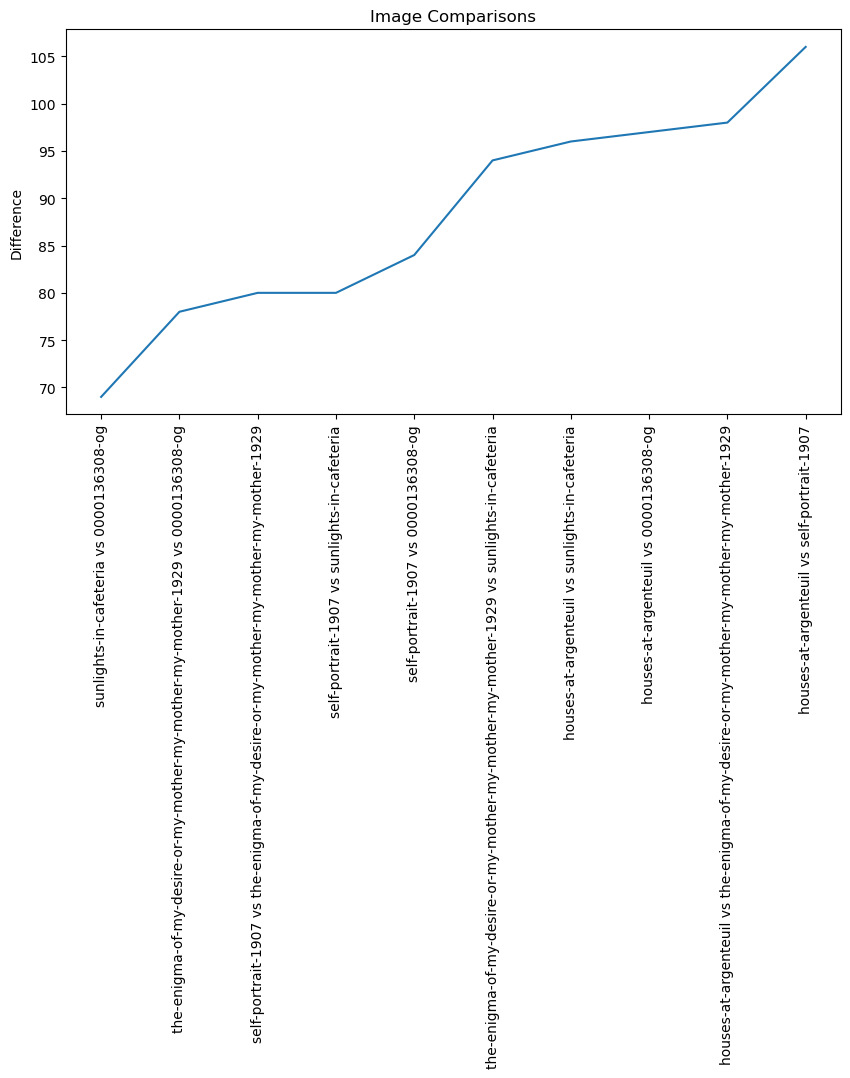

None


In [59]:
print(compare_images(images))

## Comparing two artists dissimilarity against each other.

In [93]:
import requests

def get_images_from_most_viewed(artist_names):
    base_url = "https://www.wikiart.org/en/App/Painting/MostViewedPaintings"

    # Define the parameters for the API request
    params = {
        "json": 2,
    }

    # Send a GET request to the WikiArt API
    response = requests.get(base_url, params=params)

    # Check that the request was successful
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()

        artists_images = {}

        for artist_name in artist_names:
            # Filter paintings by the specified artist
            artist_paintings = [painting for painting in data if artist_name.lower() in painting["artistName"].lower()]

            # URLs and years
            image_info = {}

            # Extract image URLs and years of paintings by the specified artist from the most viewed list
            for painting in artist_paintings:
                if is_url_valid(painting["image"]):
                    image_info[painting["title"]] = {"url": painting["image"], "year": painting["completitionYear"]}

             # Select 5 random images if there are more than 5
            if len(image_info) > 3:
                image_info = dict(random.sample(image_info.items(), 3))


            artists_images[artist_name] = image_info

        return artists_images

    else:
        print(f"Failed to get data from WikiArt API: {response.status_code}")
        return None
    
artist_names = ["Salvador Dali", "Pablo Picasso"]
artist_images = get_images_from_most_viewed(artist_names)


print(json.dumps(artist_images, indent=4))

/var/folders/l9/4ng4y3bs4hlfpm8dptzd6cdm0000gn/T/ipykernel_42530/1123571986.py:35: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  image_info = dict(random.sample(image_info.items(), 3))


{
    "Salvador Dali": {
        "The Persistence of Memory": {
            "url": "https://uploads1.wikiart.org/00475/images/salvador-dali/w1siziisijm4njq3mcjdlfsiccisimnvbnzlcnqilcitcxvhbgl0esa5mcatcmvzaxplidiwmdb4mjawmfx1mdazzsjdxq.jpg!Large.jpg",
            "year": 1931
        },
        "Landscape": {
            "url": "https://uploads5.wikiart.org/00162/images/salvador-dali/3salvador-dali-peyzazh-bliz-figerasa.jpg!Large.jpg",
            "year": 1914
        },
        "The Discovery of America by Christopher Columbus": {
            "url": "https://uploads2.wikiart.org/images/salvador-dali/the-discovery-of-america-by-christopher-columbus-1959.jpg!Large.jpg",
            "year": 1959
        }
    },
    "Pablo Picasso": {
        "The girls of Avignon": {
            "url": "https://uploads2.wikiart.org/00492/images/pablo-picasso/les-demoiselles-d-avignon-1907.jpg!Large.jpg",
            "year": 1907
        },
        "A rooster": {
            "url": "https://uploads1.wikia

In [88]:
# artist_images = {
#     "Salvador Dali": {
#         "The Persistence of Memory": {
#             "url": "https://uploads1.wikiart.org/00475/images/salvador-dali/w1siziisijm4njq3mcjdlfsiccisimnvbnzlcnqilcitcxvhbgl0esa5mcatcmvzaxplidiwmdb4mjawmfx1mdazzsjdxq.jpg!Large.jpg",
#             "year": 1931
#         }
#     },
#     "Pablo Picasso": {
#         "Self-Portrait": {
#             "url": "https://uploads3.wikiart.org/images/pablo-picasso/self-portrait-1896.jpg!Large.jpg",
#             "year": 1896
#         }
#     }
# }
import matplotlib.pyplot as plt
from urllib.parse import urlparse
from itertools import combinations
import json

def compare_images(artists):
    print('artists: ', json.dumps(artists, indent=4))
    image_descriptions = {}

    for artist, paintings in artists.items():
        for painting_name, painting_info in paintings.items():
            print(artist)
            print(painting_name)
            print(painting_info['url'])
            description = image_to_text(painting_info['url'])
            attributes = description_to_all_attributes(description)
            image_descriptions[painting_name] = attributes

    comparisons = []
    for (image1, attr1), (image2, attr2) in combinations(image_descriptions.items(), 2):

        difference = image_labels_discimilarity(attr1, attr2)
        print(f'Difference: {difference}')
        comparisons.append((f"{image1} vs {image2}", difference))
        print(f'Comparisons: {comparisons}')

    

    plt.figure(figsize=(10, 5))
    plt.scatter([c[0] for c in comparisons], [c[1] for c in comparisons])
    plt.xticks(rotation=90)
    plt.ylabel('Difference')
    plt.title('Image Comparisons')
    plt.show()

comparisons = compare_images(artists_images)
print(json.dumps(comparisons, indent=4))


artists:  {
    "Salvador Dali": {
        "Ballerina in a Death's Head": {
            "url": "https://uploads3.wikiart.org/images/salvador-dali/ballerina-in-a-death-s-head.jpg!Large.jpg",
            "year": 1939
        },
        "The Disintegration of the Persistence of Memory": {
            "url": "https://uploads5.wikiart.org/images/salvador-dali/the-disintegration-of-the-persistence-of-memory.jpg!Large.jpg",
            "year": 1954
        },
        "The Great Masturbator": {
            "url": "https://uploads3.wikiart.org/00475/images/salvador-dali/salvador-dali-the-great-masturbator-1929-obelisk-art-history.jpg!Large.jpg",
            "year": 1929
        }
    },
    "Pablo Picasso": {
        "The girls of Avignon": {
            "url": "https://uploads2.wikiart.org/00492/images/pablo-picasso/les-demoiselles-d-avignon-1907.jpg!Large.jpg",
            "year": 1907
        },
        "Science and Charity": {
            "url": "https://uploads0.wikiart.org/images/pablo-pi

KeyboardInterrupt: 

/var/folders/l9/4ng4y3bs4hlfpm8dptzd6cdm0000gn/T/ipykernel_42530/2051929543.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


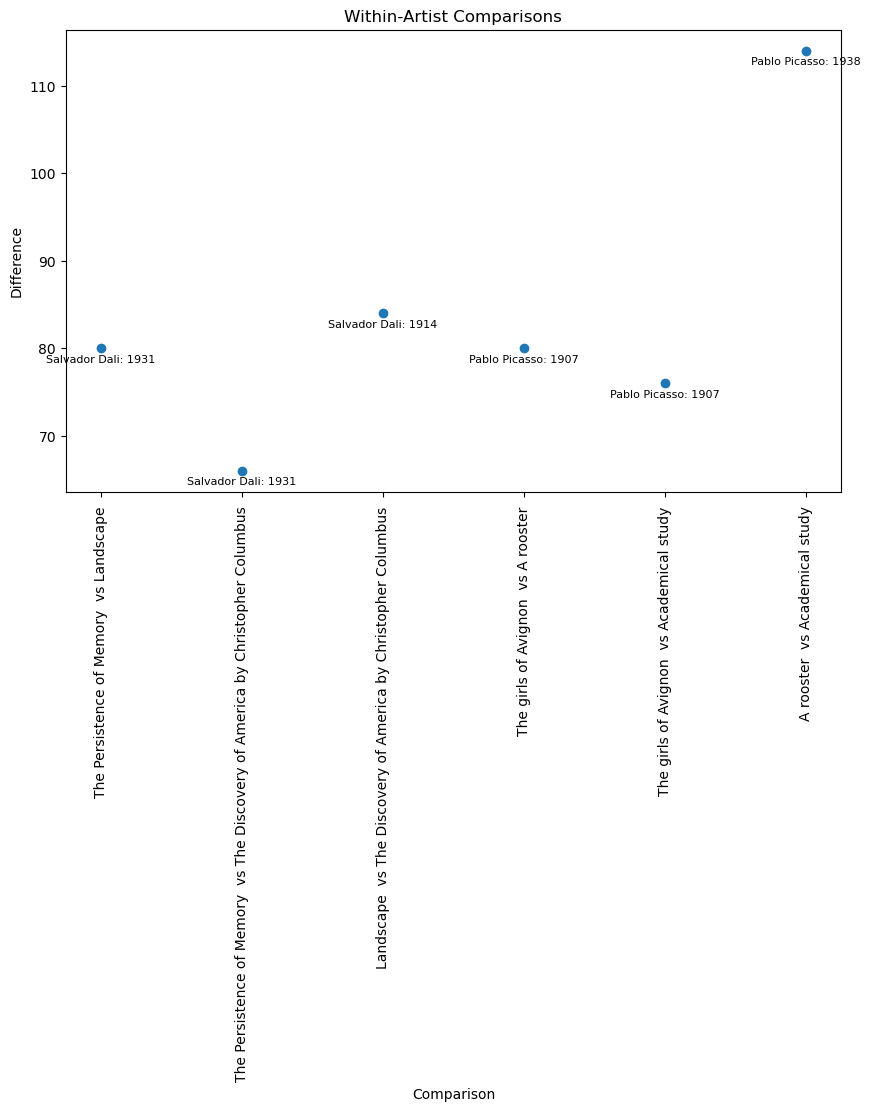

/var/folders/l9/4ng4y3bs4hlfpm8dptzd6cdm0000gn/T/ipykernel_42530/2051929543.py:63: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


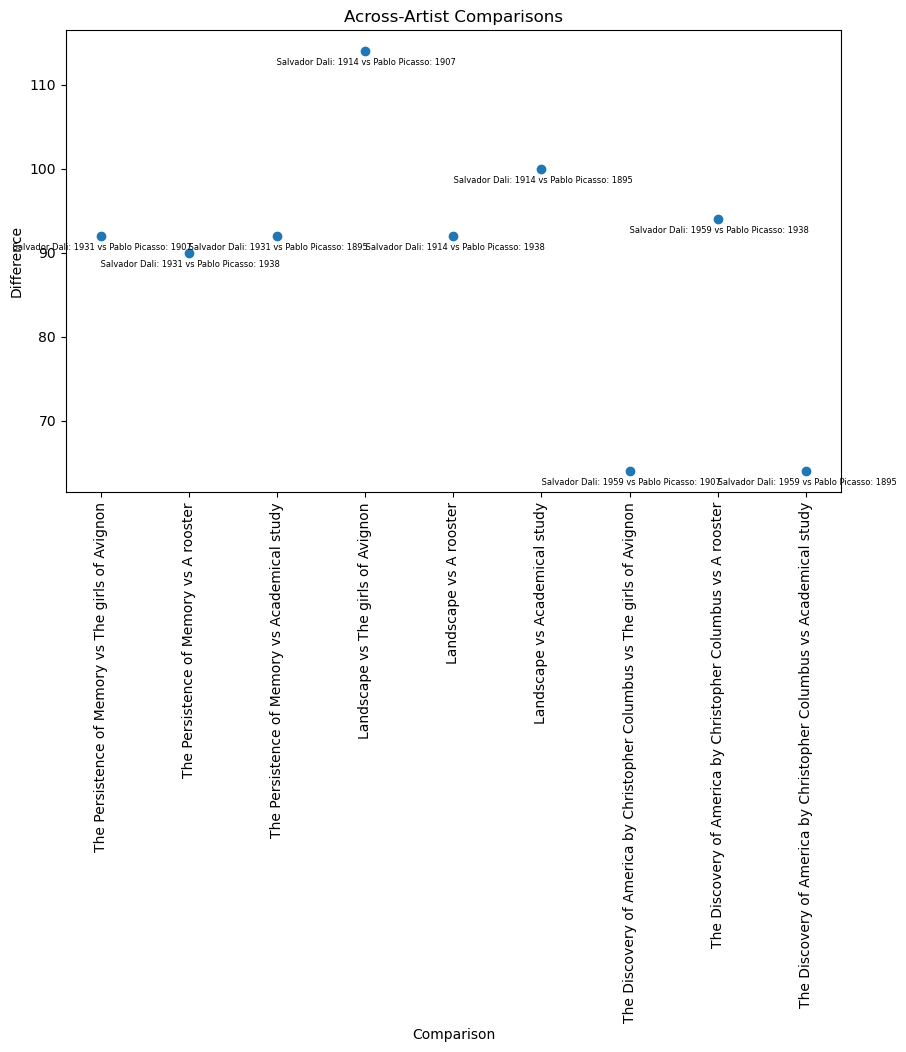

<Figure size 640x480 with 0 Axes>

In [127]:
import matplotlib.pyplot as plt
from itertools import combinations
import json


def compare_images(artists):
    print('artists: ', json.dumps(artists, indent=4))
    image_descriptions = {}
    within_artist_comparisons = []
    across_artist_comparisons = []
    within_artist_annotations = []
    across_artist_annotations = []

    for artist, paintings in artists.items():
        for painting_name, painting_info in paintings.items():
            description = image_to_text(painting_info['url'])
            attributes = description_to_all_attributes(description)
            image_descriptions[painting_name] = (attributes, artist, painting_info['year'])

    for (image1, (attr1, artist1, year1)), (image2, (attr2, artist2, year2)) in combinations(image_descriptions.items(), 2):
        difference = image_labels_discimilarity(attr1, attr2)
        if artist1 == artist2:
            within_artist_comparisons.append((f"{image1}  vs {image2} ", difference))
            within_artist_annotations.append((f"{artist1}: {year1}", difference))
        else:
            across_artist_comparisons.append((f"{image1} vs {image2}", difference))
            across_artist_annotations.append((f" {artist1}: {year1} vs {artist2}: {year2}", difference))

    print('within_artist_comparisons', within_artist_comparisons)
    print('within_artist_annotations', within_artist_annotations)

    return within_artist_comparisons, across_artist_comparisons, within_artist_annotations, across_artist_annotations

# within_artist_comparisons, across_artist_comparisons, within_artist_annotations, across_artist_annotations = compare_images(artist_images)


plt.figure(figsize=(10, 6))  # Create a new figure for this plot
x1 = [c[0] for c in within_artist_comparisons]
y1 = [c[1] for c in within_artist_comparisons]
w1 = [c[0] for c in within_artist_annotations]
plt.scatter(x1, y1)
for i, txt in enumerate(w1):
    plt.annotate(txt, (x1[i], y1[i]),textcoords='offset points', xytext=(0, -10), ha='center', fontsize=8)
plt.title("Within-Artist Comparisons")
plt.xlabel("Comparison")
plt.ylabel("Difference")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot across-artist comparisons
plt.figure(figsize=(10, 6))  # Create a new figure for this plot
x2 = [c[0] for c in across_artist_comparisons]
y2 = [c[1] for c in across_artist_comparisons]
w2 = [c[0] for c in across_artist_annotations]
plt.scatter(x2, y2)
for i, txt in enumerate(w2):
    plt.annotate(txt, (x2[i], y2[i]), textcoords='offset points', xytext=(0, -10), ha='center', fontsize=6)
plt.title("Across-Artist Comparisons")
plt.xlabel("Comparison")
plt.ylabel("Difference")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.subplots_adjust(wspace=10)  # Increase space between subplots
plt.tight_layout()
plt.show()

### Updated `description_to_all_attributes` function with validation functions for more consistent and compatible attribute outputs @Taru 

In [128]:

def validate_attributes(attributes_dict, predefined_list):
    for key, values in attributes_dict.items():
        # Filter out invalid values
        valid_values = [value for value in values if value in predefined_list[key]]
        
        # If there are missing values, append predefined values at the end
        if len(valid_values) < len(values):
            # Get the predefined values that are not in valid_values
            missing_values = [value for value in predefined_list[key] if value not in valid_values]
            
            # Append the missing values at the end of valid_values
            valid_values.extend(missing_values[:len(values)-len(valid_values)])
        
        # Replace the original values with the valid values
        attributes_dict[key] = valid_values

    return attributes_dict

def validate_attributes_content(attribute_content):
    if '```json' in attribute_content:
        attribute_content = attribute_content.replace('```json', '')
        attribute_content = attribute_content.replace('```', '')
    
    # Find the first occurrence of '{' and the last occurrence of '}'
    start_index = attribute_content.find('{')
    end_index = attribute_content.rfind('}')

    # If '{' and '}' are found, slice the string to include only the content within these brackets
    if start_index != 0 and end_index != len(attribute_content) - 1:
        attribute_content = attribute_content[start_index:end_index+1]

    try:
        json.loads(attribute_content)
    except json.JSONDecodeError:
        return '{}'
    
    return attribute_content


def description_to_all_attributes(description):

    predefined_list = {
        'Color Palette': ['Vibrant', 'Monochromatic', 'Pastel', 'Earthy', 'Neon', 'Muted', 'Bold'],
        'Subject Matter': ['Landscape', 'Portrait', 'Still life', 'Abstract', 'Urban', 'Nature', 'Architecture'],
        'Mood/Emotion': ['Serene', 'Energetic', 'Melancholic', 'Joyful', 'Mysterious', 'Peaceful', 'Dramatic'],
        'Style/Aesthetic': ['Realism', 'Impressionism', 'Surrealism', 'Minimalism', 'Expressionism', 'Cubism', 'Romanticism'],
        'Setting/Location': ['Cityscape', 'Countryside', 'Beach', 'Forest', 'Mountains', 'Urban', 'Rural'],
        'Time Period': ['Contemporary', 'Renaissance', 'Medieval', 'Modern', 'Ancient', 'Futuristic', 'Victorian'],
        'Cultural/Symbolic Representation': ['Religious', 'Political', 'Mythological', 'Historical', 'Indigenous', 'Pop culture', 'Folklore']
    }


    response = client.chat.completions.create(
        model = "gpt-4-turbo",
        messages=[
            {
                "role": "system",
                "content": f"""
                You are a machine learning model trained to extract specific attributes from a detailed 
                description of an image. Your task is to identify and select the most appropriate label from 
                the following pre-defined set of attributes for each of the seven categories given below, and
                represent them as key-value pairs in a Python dictionary: 

                1. Color Palette: Select exactly 7 labels without repetition from only the following options, 
                ordered from the most closely associated to the least associated with the image: 
                {predefined_list['Color Palette']}. 

                2. Subject Matter: Select exactly 7 labels without repetition from only the following options, 
                ordered from the most closely associated to the least associated with the image: 
                {predefined_list['Subject Matter']}. 

                3. Mood/Emotion: Select exactly 7 labels without repetition from only the following options, 
                ordered from the most closely associated to the least associated with the image: 
                {predefined_list['Mood/Emotion']}. 

                4. Style/Aesthetic: Select exactly 7 labels without repetition from ONLY the following options, 
                ordered from the most closely associated to the least associated with the image: 
                {predefined_list['Style/Aesthetic']}. 

                5. Setting/Location: Select exactly 7 labels without repetition from only the following options, 
                ordered from the most closely associated to the least associated with the image: 
                {predefined_list['Setting/Location']}. 

                6. Time Period: Select exactly 7 labels without repetition from only the following options, 
                ordered from the most closely associated to the least associated with the image: 
                {predefined_list['Time Period']}.

                7. Cultural/Symbolic Representation: Select Exactly 7 labels without repetition from only the 
                following options, ordered from the most closely associated to the least associated with the image: 
                {predefined_list['Cultural/Symbolic Representation']}

                Please provide your output in the following format:  
                {{'Color Palette': ['most associated label', ..., 'least associated label'],  
                'Subject Matter': ['most associated label', ..., 'least associated label'],  
                'Mood/Emotion': ['most associated label', ..., 'least associated label'], 
                'Style/Aesthetic': ['most associated label', ..., 'least associated label'],  
                'Setting/Location': ['most associated label', ..., 'least associated label'],  
                'Time Period': ['most associated label', ..., 'least associated label'],  
                'Cultural/Symbolic Representation': ['most associated label', ..., 'least associated label']}}. 

                If an attribute is not obvious, infer from the context of the description an attribute, 
                don't use 'none' or 'not specified' as an attribute. Remember, you MUST ONLY select attribute values from the provided
                list of options. DO NOT assign any attribute that is not present in the pre-defined attributes. I repeat - no label in the result should be outside the predefined 
                set of labels for each attribute. Format the output in double quotations so it can be 
                converted into an object with json. The description is as follows:""" + description
            }
        ],
        max_tokens=500,
    )
    
    attributes_content = response.choices[0].message.content
    # print('attribute_content', attributes_content)

    attributes_content = validate_attributes_content(attributes_content)

    print('attributes_content: ', attributes_content)

    try:
        attributes_dict = json.loads(attributes_content)
    except json.JSONDecodeError:
        attributes_dict = '{}'

    print('attributes_dict: ', attributes_dict)
    
    attributes_dict = validate_attributes(attributes_dict, predefined_list)

    print('attributes_dict validated: ', attributes_dict)

    return attributes_dict